# Trending YouTube Video Statistics

In this notebook, United States trending YouTube video Statistics are studied. The data contains 40949 YouTube video details and 16 features. One video will appear more than once in this dataset, since it is possible that a video stays in the trending list for many days.

# 1. Import packages

In [459]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import json
import seaborn
from wordcloud import WordCloud, STOPWORDS
from statistics import variance

# 2. Load the data

In [460]:
YouTube = pd.read_csv("./YOUTUBE DATA/USvideos.csv")

# 3. Explore the data

In [461]:
YouTube.head(1).T

,0
video_id,2kyS6SvSYSE
trending_date,17.14.11
title,WE WANT TO TALK ABOUT OUR MARRIAGE
channel_title,CaseyNeistat
category_id,22
publish_time,2017-11-13T17:13:01.000Z
tags,SHANtell martin
views,748374
likes,57527
dislikes,2966


In [462]:
YouTube.shape

(40949, 16)

In [463]:
YouTube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

We can see that trending_date and publish_time are datetime objects. We will have to fix this at some point. Also, there are 40949 data but in the description column 40379. Looks like we have some data missing. We will have to work on that as well.

In [464]:
#Summary of numerical variables
YouTube.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


It can be observed that videos have been in the trending list even though it has zero likes. Number of comments being zero is possible since some videos have disabled commenting.

In [465]:
#Summary of categorical variables
YouTube.describe(include=['O']).T

,count,unique,top,freq
video_id,40949,6351,j4KvrAUjn6c,30
trending_date,40949,205,17.18.11,200
title,40949,6455,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,30
channel_title,40949,2207,ESPN,203
publish_time,40949,6269,2018-05-18T14:00:04.000Z,50
tags,40949,6055,[none],1535
thumbnail_link,40949,6352,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,30
description,40379,6901,► Listen LIVE: http://power1051fm.com/\n► Face...,58


There 40949 videos, but only 6351 of them are unique. This makes sense because a video could be trending for more than one day. Most appeared channel is ESPN while the most appeared video title is 'WE MADE OUR MOM CRY...HER DREAM CAME TRUE'.

There are 205 unique dates in this dataset.

# 4. Clean the data

In [466]:
YouTube.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

### 4.1 Remove irrelevant features

In [467]:
del_col =['thumbnail_link', 'description']
df = YouTube.drop(del_col, axis=1)
df.shape

(40949, 14)

### 4.2 Check for duplicates

In [468]:
#check for duplicates
df.duplicated().value_counts()

False    40901
True        48
dtype: int64

We have 48 duplicated rows. Best way to handle this is to get rid of those rows. since it is just 48 out of 40949, it would not effect much.

In [469]:
df[df.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
34899,QBL8IRJ5yHU,18.15.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",1469627,188652,3124,33032,False,False,False
34900,t4pRQ0jn23Q,18.15.05,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,2018-05-14T14:00:03.000Z,"sneakerhead|""complex""|""complex originals""|""sne...",1199587,49709,2380,7261,False,False,False
34901,j4KvrAUjn6c,18.15.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727,77378,12160,15874,False,False,False
34902,MAjY8mCTXWk,18.15.05,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",杰威爾音樂 JVR Music,10,2018-05-14T15:59:47.000Z,"周杰倫|""Jay""|""Chou""|""周董""|""周杰伦""|""周傑倫""|""杰威尔""|""周周""|""...",916128,40485,1042,4746,False,False,False
34903,xhs8tf1v__w,18.15.05,Terry Crews Answers the Web's Most Searched Qu...,WIRED,24,2018-05-14T16:00:29.000Z,"autocomplete|""deadpool 2""|""google autocomplete...",343967,16988,132,1308,False,False,False
34904,E21NATEP9QI,18.15.05,Why Stradivarius violins are worth millions,Vox,25,2018-05-14T12:00:03.000Z,"vox.com|""vox""|""explain""|""stradivarius""|""violin...",433833,12356,307,1129,False,False,False
34905,jzLlsbdrwQk,18.15.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",3081033,60379,6857,7796,False,False,False
34906,1RZYOeQeIXE,18.15.05,Sarah Paulson Gets Scared During '5 Second Rule',TheEllenShow,24,2018-05-14T13:00:00.000Z,"ellen|""ellen degeneres""|""the ellen show""|""seas...",704786,19880,248,669,False,False,False
34907,WF82ABLw8s4,18.15.05,Gabby Barrett Sings I Have Nothing by Whitney ...,American Idol,24,2018-05-14T02:23:01.000Z,"ABC|""americanidol""|""idol""|""american idol""|""rya...",735031,11734,1468,1870,False,False,False
34908,r-3iathMo7o,18.15.05,"The ULTIMATE $30,000 Gaming PC Setup",Unbox Therapy,28,2018-05-13T19:00:25.000Z,"gaming setup|""gaming""|""setup""|""fortnite""|""fort...",4700460,103430,8028,13293,False,False,False


In [470]:
df.drop_duplicates(inplace=True)

In [471]:
YouTube["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize = True)

2018    0.765562
2017    0.234438
Name: trending_date, dtype: float64

76.6% of YouTube videos are from 2018 and only 23.4% of them are from 2017.

### 4.3 Formatting columns : trending_date, publish_time, category_ID

Previously, we observed that trending_date and publish_time were object type. Here they will be converted into datetime objects. And afterwards new columns called 'published_day', 'published_month', 'published_year', and 'published_time' are being introduced for further analysis.

In [472]:
#Note that trending dates are in format year.date.month
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [473]:
df['published_day'] = df['publish_time'].dt.day
df['published_month'] =df['publish_time'].dt.month
df['published_year'] =df['publish_time'].dt.year
df['published_time'] = df['publish_time'].dt.time

In [474]:
df1 = df.drop(columns='publish_time')
df1.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'published_day', 'published_month', 'published_year', 'published_time'],
      dtype='object')

We can incorporate US_category_id.json file to our dataset and obtain different categories in our dataset instead of catogory_Ids.

In [475]:
df1['category_id'] = df1['category_id'].apply(str)

In [476]:
df1_categories = pd.read_json('./YOUTUBE DATA/US_category_id.json')

In [477]:
id_to_category = {}
for category in df1_categories['items']:
    id_to_category[category['id']]=category['snippet']['title']


In [478]:
df1['category']=df1['category_id'].map(id_to_category)

In [479]:
df2=df1.drop(columns='category_id')

In [480]:
df2["title_length"]= df2["title"].str.len()

In [481]:
df2.head(1).T

,0
video_id,2kyS6SvSYSE
trending_date,2017-11-14 00:00:00
title,WE WANT TO TALK ABOUT OUR MARRIAGE
channel_title,CaseyNeistat
tags,SHANtell martin
views,748374
likes,57527
dislikes,2966
comment_count,15954
comments_disabled,False


In [482]:
#groupby video_id and pick the one with the latest trending date
df2 = df2.loc[df2.groupby('video_id').trending_date.idxmax()]

In [483]:
df2.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'tags', 'views',
       'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'published_day',
       'published_month', 'published_year', 'published_time', 'category',
       'title_length'],
      dtype='object')

Now we have 6351 observations with 17 features.

# 5. Explore Data

views, likes, dislikes, and comment_count are numerical variables in this dataset. We can explore them with the category type and channel_title to get some insights on data.

In [484]:
vldc = df2[['channel_title', 'category', 'views', 'likes', 'dislikes', 'comment_count', 'title_length']]

In [485]:
vldc.head()

,channel_title,category,views,likes,dislikes,comment_count,title_length
40208,TheEllenShow,Entertainment,800359,9773,332,423,74
15457,TheEllenShow,Entertainment,563746,4429,54,94,75
31992,Jimmy Kimmel Live,Comedy,2058516,41248,580,1484,53
3711,Molly Burke,People & Blogs,231341,7734,212,846,51
584,Saint Louis Chess Club,Education,71089,460,27,20,30


## 5.1 Which category has the highest number of videos?

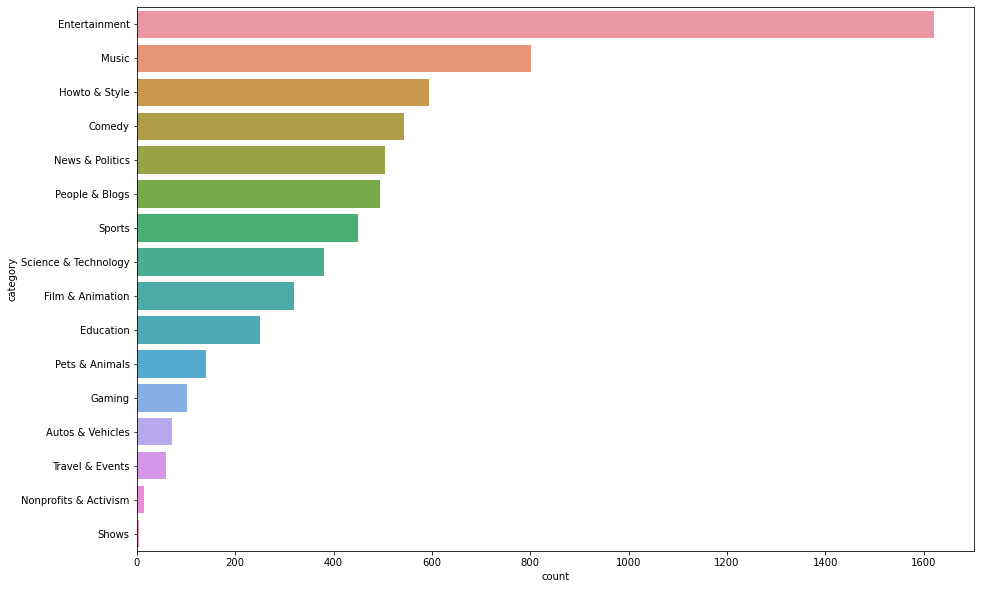

In [486]:
plt.figure(figsize=(15,10))
sns.countplot(y='category', data=vldc, order=vldc['category'].value_counts().index)
plt.show()

## 5.2 What is the most appeared channel title?

In [487]:
vldc['channel_title'].value_counts()

ESPN                                      84
TheEllenShow                              74
The Tonight Show Starring Jimmy Fallon    72
Jimmy Kimmel Live                         70
Netflix                                   58
                                          ..
BillieEilishVEVO                           1
Illumination                               1
Dwarf Mamba                                1
Braille Skateboarding                      1
Tim Gray                                   1
Name: channel_title, Length: 2198, dtype: int64

ESPN channel is the one that had appeared most in this trending list while 'The tonight show Starring Jimmy Fallon' is the second most and 'Netflix' is the third most channel title.

In [488]:
y = vldc.groupby(['category']).sum()
y.sort_values(by='comment_count', ascending=False)

,views,likes,dislikes,comment_count,title_length
category,,,,,
Music,4828174140,150641673,5264504,12865088,36964
Entertainment,2828448275,67435618,6730482,9899108,86559
People & Blogs,667660689,23000163,1377442,3052960,21228
Comedy,773843693,29960684,1067507,2986525,23704
Howto & Style,557056875,20646383,705227,2894411,29837
Film & Animation,814523799,16679618,686059,1955501,15078
Sports,639389230,12584136,797195,1489943,28517
Science & Technology,428430317,10165998,547989,1391115,15276
Gaming,239483937,6991366,624992,1386717,4891


In [489]:
def groupdata(col1, col2, color, num):
    y = vldc.groupby([col1]).sum()
    y = y.sort_values(by=col2, ascending=False)
    values = list(y[col2])
    categories = y.index
    plt.figure(figsize=(14,14))
    plt.subplot(4,1,num)
    plt.barh(categories, values, color = color)
    plt.ylabel(str(col2))
    plt.xticks(rotation=45)
    plt.show()

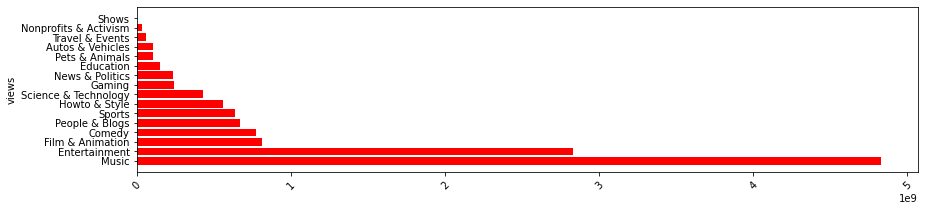

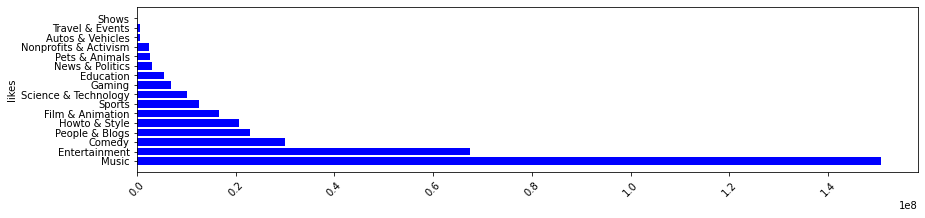

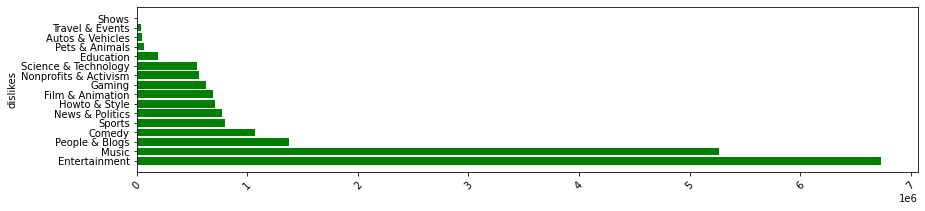

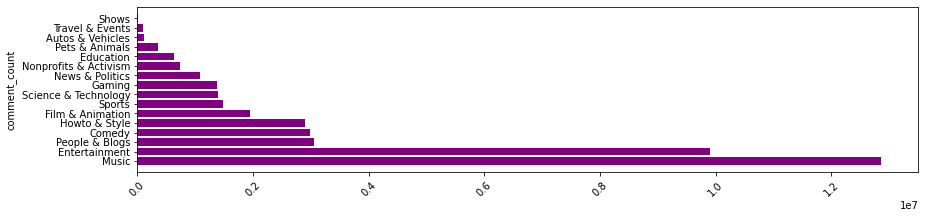

In [490]:
groupdata('category', 'views', 'red', 1)
groupdata('category', 'likes', 'blue', 2)
groupdata('category', 'dislikes', 'green', 3)
groupdata('category', 'comment_count', 'purple', 4)

Music category has the highest number of likes, dislikes, views, and comment_count, while shows has the least of them all. Music and Entertainment seem to be always dominating the first and second places when it comes to the number of likes, dislikes, comment count, and views in the trending list.

In [491]:
def top5(col1, col2):
    y = df2.groupby([col1]).sum()
    y = y.sort_values(by=col2, ascending=False).head()
    return y

Table below shows the video titles of the videos which had highest number of views in the trending YouTube video dataset.

In [492]:
top5('title', 'views')

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,published_day,published_month,published_year,title_length
title,,,,,,,,,,,
Childish Gambino - This Is America (Official Video),225211923,5023450,343541,517232,0,0,0,6,5,2018,51
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,149376127,3093544,1643059,810698,0,0,0,6,12,2017,50
Ariana Grande - No Tears Left To Cry,148689896,3094021,129502,242039,0,0,0,20,4,2018,36
"Becky G, Natti Natasha - Sin Pijama (Official Video)",139334502,1425496,119798,83941,0,0,0,20,4,2018,52
BTS (방탄소년단) 'FAKE LOVE' Official MV,123010920,5613827,206892,1228655,0,0,0,18,5,2018,35


Table below shows the video titles of the videos which had highest number of likes in the trending YouTube video dataset.

In [493]:
top5('title', 'likes')

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,published_day,published_month,published_year,title_length
title,,,,,,,,,,,
BTS (방탄소년단) 'FAKE LOVE' Official MV,123010920,5613827,206892,1228655,0,0,0,18,5,2018,35
Childish Gambino - This Is America (Official Video),225211923,5023450,343541,517232,0,0,0,6,5,2018,51
Ariana Grande - No Tears Left To Cry,148689896,3094021,129502,242039,0,0,0,20,4,2018,36
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,149376127,3093544,1643059,810698,0,0,0,6,12,2017,50
BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV,36857298,2729292,47896,546100,0,0,0,24,11,2017,53


Table below shows the video titles of the videos which had highest number of dislikes in the trending YouTube video dataset.

In [494]:
top5('title', 'dislikes')

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,published_day,published_month,published_year,title_length
title,,,,,,,,,,,
So Sorry.,37539570,1402578,1674420,1361580,0,0,0,2,1,2018,9
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,149376127,3093544,1643059,810698,0,0,0,6,12,2017,50
Suicide: Be Here Tomorrow.,24286474,1988746,497847,658130,0,0,0,24,1,2018,26
Childish Gambino - This Is America (Official Video),225211923,5023450,343541,517232,0,0,0,6,5,2018,51
LOGAN PAUL IS BACK!,14161833,1216340,291900,436698,0,0,0,4,2,2018,19


In [495]:
corr_matrix = df2[['views', 'likes', 'dislikes', 'comment_count', 'title_length']].corr()
corr_matrix

,views,likes,dislikes,comment_count,title_length
views,1.000000,0.834639,0.441923,0.573885,-0.041966
likes,0.834639,1.000000,0.420619,0.765288,-0.081465
dislikes,0.441923,0.420619,1.000000,0.734943,-0.034779
comment_count,0.573885,0.765288,0.734943,1.000000,-0.068389
title_length,-0.041966,-0.081465,-0.034779,-0.068389,1.000000


Number of views and the number of likes seem to be positily correlated. Also, the number of comments and views seem to considerably correlated.

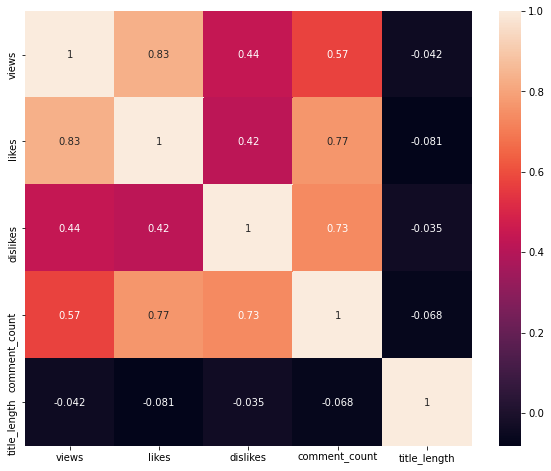

In [496]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(corr_matrix, annot=True)

Likes and views have a strong correlation. comment_count and dislikes also have decent correlation with correlation coefficient of 0.7.

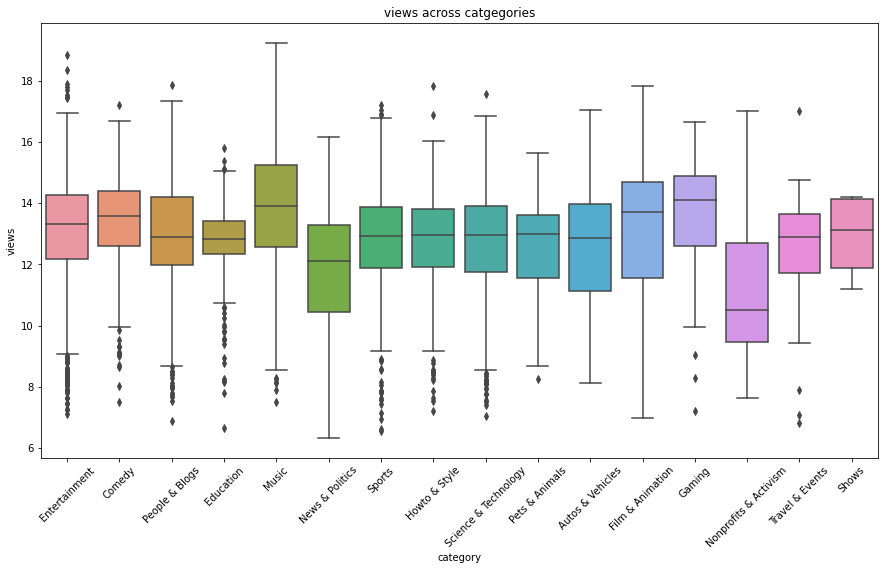

In [497]:
plt.figure(figsize = (15,8))
ax1 = sns.boxplot(x = df2['category'], y = np.log(df2['views']), data = df2)
ax1.set_title('views across catgegories')
plt.xticks(rotation = 45)
plt.show()

C:\Users\ROSA\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


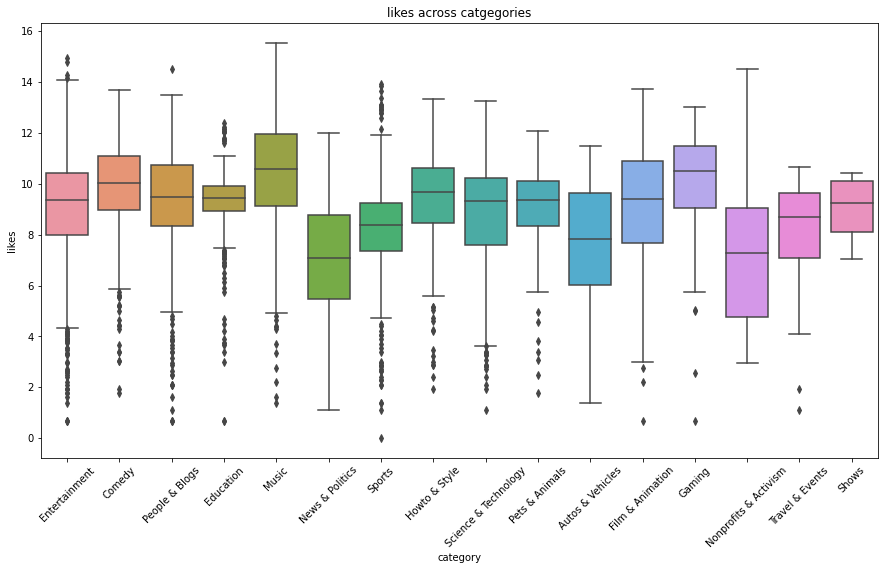

In [498]:
plt.figure(figsize = (15,8))
ax2 = sns.boxplot(x = df2['category'], y = np.log(df2['likes']), data = df2)
ax2.set_title('likes across catgegories')
plt.xticks(rotation = 45)
plt.show()

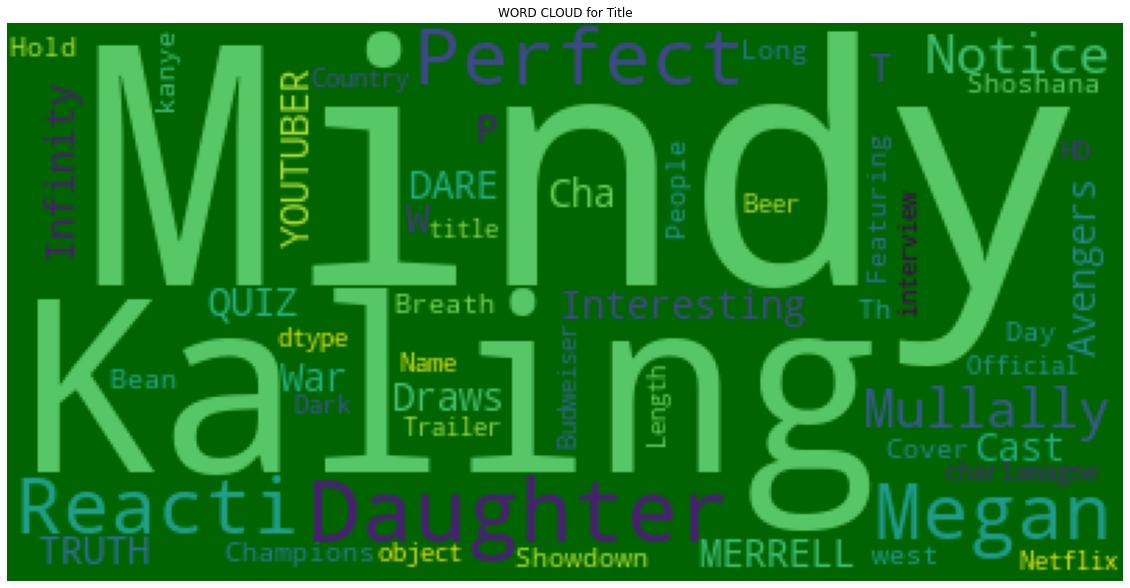

In [499]:
plt.figure(figsize=(20,20))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'darkgreen', stopwords=stopwords, 
                      max_words=100, max_font_size =120, random_state=42).generate(str(df2['title']))
plt.imshow(wordcloud)
plt.title('WORD CLOUD for Title')
plt.axis('off')
plt.show()

Above plotshows the most appeared words in the title of trending videos.

In [500]:
x1 = np.log(df2['views'])
y1 = np.log(df2['likes'])
y2 = np.log(df2['dislikes'])
y3 = np.log(df2['comment_count'])

C:\Users\ROSA\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='views', ylabel='likes'>

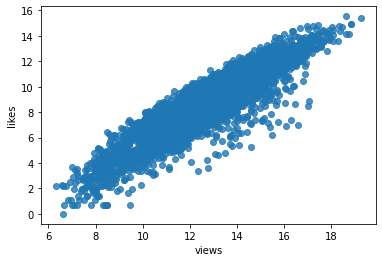

In [501]:
sns.regplot(x=x1, y=y1, fit_reg=False)

<AxesSubplot:xlabel='views', ylabel='dislikes'>

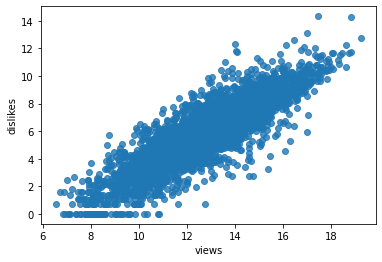

In [502]:
sns.regplot(x=x1, y=y2, fit_reg=False)

<AxesSubplot:xlabel='views', ylabel='comment_count'>

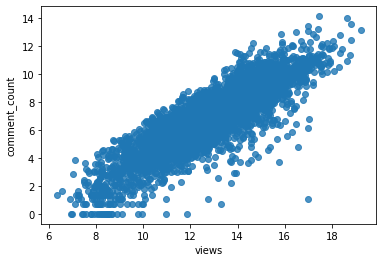

In [503]:
sns.regplot(x=x1, y=y3, fit_reg=False)

<AxesSubplot:xlabel='likes', ylabel='dislikes'>

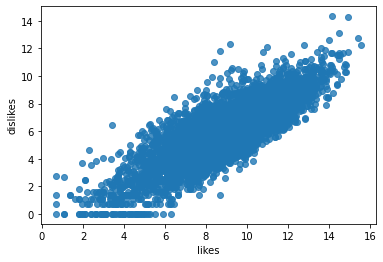

In [504]:
sns.regplot(x=y1, y=y2, fit_reg=False)

<AxesSubplot:xlabel='likes', ylabel='comment_count'>

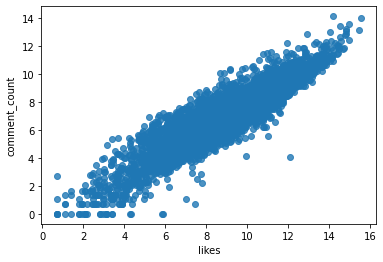

In [505]:
sns.regplot(x=y1, y=y3, fit_reg=False)

<AxesSubplot:xlabel='dislikes', ylabel='comment_count'>

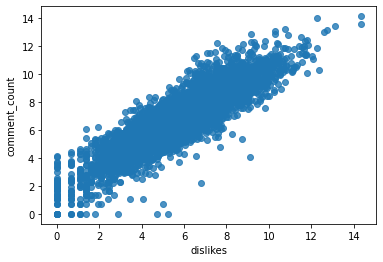

In [506]:
sns.regplot(x=y2, y=y3, fit_reg=False)

False    6246
True      105
Name: comments_disabled, dtype: int64


<AxesSubplot:xlabel='comments_disabled', ylabel='count'>

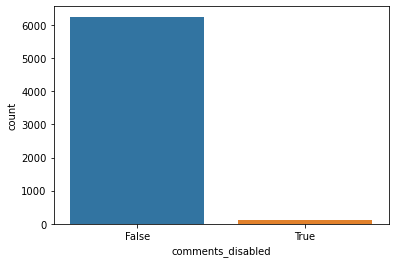

In [507]:
print(df2['comments_disabled'].value_counts())
sns.countplot(x='comments_disabled', data=df2)

<AxesSubplot:xlabel='comments_disabled', ylabel='likes'>

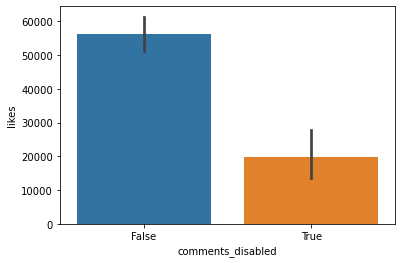

In [508]:
sns.barplot(x='comments_disabled', y='likes', data=df2)

In [509]:
df2.groupby('published_year')['likes', 'dislikes','views','comment_count'].mean()

<ipython-input-509-9dd63d77d325>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby('published_year')['likes', 'dislikes','views','comment_count'].mean()


,likes,dislikes,views,comment_count
published_year,,,,
2006,459.000000,152.000000,2.585060e+05,82.000000
2008,198.000000,3.666667,5.463167e+04,46.666667
2009,197.600000,2.400000,3.842720e+04,24.600000
2010,239.833333,15.166667,7.181650e+04,59.666667
2011,393.375000,92.375000,4.989750e+04,142.750000
2012,266.125000,9.375000,6.429962e+04,45.875000
2013,71.230769,10.846154,2.103285e+04,9.769231
2014,662.000000,36.571429,1.031973e+05,137.142857
2015,1169.900000,22.200000,8.105670e+04,126.900000


<AxesSubplot:xlabel='published_month', ylabel='views'>

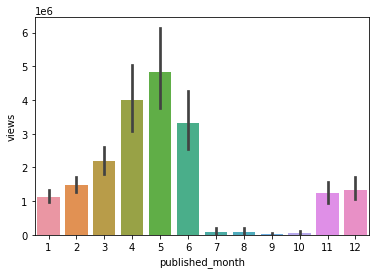

In [510]:
sns.barplot(x=df2['published_month'], y=df2['views'])

# 6. Data Preprocessing

## 6.1 Boolean features

In [511]:
df2.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'tags', 'views',
       'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'published_day',
       'published_month', 'published_year', 'published_time', 'category',
       'title_length'],
      dtype='object')

In [512]:
df3 = df2[['views',
       'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'published_day',
       'published_month', 'published_year']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 40208 to 16559
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                6351 non-null   object        
 1   trending_date           6351 non-null   datetime64[ns]
 2   title                   6351 non-null   object        
 3   channel_title           6351 non-null   object        
 4   tags                    6351 non-null   object        
 5   views                   6351 non-null   int64         
 6   likes                   6351 non-null   int64         
 7   dislikes                6351 non-null   int64         
 8   comment_count           6351 non-null   int64         
 9   comments_disabled       6351 non-null   bool          
 10  ratings_disabled        6351 non-null   bool          
 11  video_error_or_removed  6351 non-null   bool          
 12  published_day           6351 non-null   int

In [513]:
df2['comments_disabled'] = df2['comments_disabled'].astype(int)
df2['ratings_disabled'] = df2['ratings_disabled'].astype(int)
df2['video_error_or_removed'] = df2['video_error_or_removed'].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 40208 to 16559
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                6351 non-null   object        
 1   trending_date           6351 non-null   datetime64[ns]
 2   title                   6351 non-null   object        
 3   channel_title           6351 non-null   object        
 4   tags                    6351 non-null   object        
 5   views                   6351 non-null   int64         
 6   likes                   6351 non-null   int64         
 7   dislikes                6351 non-null   int64         
 8   comment_count           6351 non-null   int64         
 9   comments_disabled       6351 non-null   int32         
 10  ratings_disabled        6351 non-null   int32         
 11  video_error_or_removed  6351 non-null   int32         
 12  published_day           6351 non-null   int

##  6.3 Train/Test Split

In [514]:
# spliting training and testing data
from sklearn.model_selection import train_test_split

X = df3.drop('views', axis=1, inplace=False)
y = df3['views']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)

In [515]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
std = StandardScaler().fit(X_train)

# transform training data
X_train_std = std.transform(X_train)

# transform testing dataabs
X_test_std = std.transform(X_test)

In [516]:
l = LinearRegression().fit(X_train_std, y_train)

In [517]:
y_train_pred = l.predict(X_train_std)
y_test_pred = l.predict(X_test_std)

In [518]:
MAE = mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)
MAE

(1060767.6850802233, 1140347.7169769784)

In [521]:
r2 = r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)
r2

(0.7741877778826335, -0.04655098728919205)

# 6.3.1 Applying TfidfVectorizer to the 'title' column

In [522]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')
tv.fit(df1['title'])
tv_transformed = tv.transform(df1['title'])

In [523]:
tv_df = pd.DataFrame(tv_transformed.toarray(), columns = tv.get_feature_names()).add_prefix('TFIDF_')
tv_df = tv_df.loc[:,round(tv_df.var(),2) > 0.00]

In [524]:
df3 = pd.concat([df2, tv_df], axis=1, sort=False)
df3.shape

(40949, 65)